In [1]:
import numpy as np
import torch
import torch.nn.functional as F
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import random

In [2]:
x = np.arange(-2*np.pi, 2*np.pi, 0.2)

y = torch.tensor(np.sin(x))
dft = torch.abs(torch.fft.fftshift(torch.fft.fft(y)))

relu_y = F.relu(y)
relu_dft = torch.abs(torch.fft.fftshift(torch.fft.fft(relu_y)))

sp_y = F.softplus(y)
sp_dft = torch.abs(torch.fft.fftshift(torch.fft.fft(sp_y)))

th_y = torch.tanh(y)
th_dft = torch.abs(torch.fft.fftshift(torch.fft.fft(th_y)))

hth_y = F.hardtanh(y, min_val=-0.3, max_val=0.3)
hth_dft = torch.abs(torch.fft.fftshift(torch.fft.fft(hth_y)))

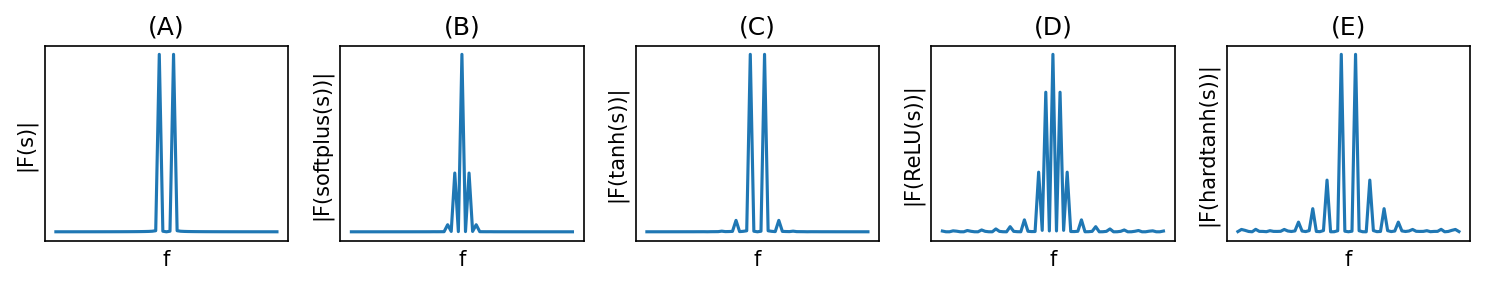

In [3]:
fig, ax = plt.subplots(
    1, 5, 
    figsize=(10, 2), 
    dpi=150,
    facecolor='white'
)

ax[0].plot(x, dft)
ax[0].set_title("(A)")
ax[0].set_ylabel("|F(s)|")
ax[0].set_xlabel("f")

ax[1].plot(x, sp_dft)
ax[1].set_title("(B)")
ax[1].set_ylabel("|F(softplus(s))|")
ax[1].set_xlabel("f")

ax[2].plot(x, th_dft)
ax[2].set_title("(C)")
ax[2].set_ylabel("|F(tanh(s))|")
ax[2].set_xlabel("f")

ax[3].plot(x, relu_dft)
ax[3].set_title("(D)")
ax[3].set_ylabel("|F(ReLU(s))|")
ax[3].set_xlabel("f")

ax[4].plot(x, hth_dft)
ax[4].set_title("(E)")
ax[4].set_ylabel("|F(hardtanh(s))|")
ax[4].set_xlabel("f")

for a in ax:
    a.set_xticks([])
    a.set_yticks([])
    
plt.tight_layout()
plt.savefig("./masks/blue_shift.png", bbox_inches='tight')
plt.show()